In [33]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.datasets import fetch_openml

In [34]:
data = pd.read_csv('../data/adult_preprocessed.csv')

In [35]:
data.head()

,Idade,Classe Trabalhadora,fnlwgt,Educação,N da Educação,Estado Civil,Ocupação,Relacionamento,Raça,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,País de Origem,Classe,Horas por Idade,Interacao educacao horas,log Ganho de Capital,log Perda de Capital
0,0.034988,State-gov,0.044302,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.078612,0.0,-0.035429,United-States,0,-0.001240,-0.040203,0.075675,0.0
1,0.850963,Self-emp-not-inc,0.048238,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.222153,United-States,0,-1.890969,-2.521563,0.000000,0.0
2,-0.039191,Private,0.138113,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035429,United-States,0,0.001389,0.014882,0.000000,0.0
3,1.073501,Private,0.151068,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035429,United-States,0,-0.038034,0.042425,0.000000,0.0
4,-0.780986,Private,0.221488,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035429,Cuba,0,0.027670,-0.040203,0.000000,0.0


In [36]:
# Preparando a base de dados
data.dropna(inplace=True)

In [37]:
# Dividindo as features e o target
X = data.drop('Classe', axis=1)
y = (data['Classe']).astype(int)

In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Classe, Length: 32561, dtype: int64

In [39]:
# Codificando variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

In [40]:
# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
# Normalizando os dados numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Definindo os classificadores a serem testados
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Árvore de Decisão': DecisionTreeClassifier(max_depth=5),
    'SVM': SVC(probability=True, C=1.0, kernel='linear'),
    'RNA': MLPClassifier(max_iter=500, hidden_layer_sizes=(100,)),
    'Regressão Logística': LogisticRegression(max_iter=500),
    'SGD': SGDClassifier(max_iter=500, learning_rate='optimal')
}

In [43]:
# Função para treinar e avaliar os modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Adicionando zero_division=0 para evitar UndefinedMetricWarning
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Verificando se o modelo possui duas classes
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba.shape[1] > 1 else 0.0
    else:
        roc_auc = 0.0  # Se o modelo não suporta predict_proba
        
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

In [44]:
print("Distribuição das classes no conjunto de treinamento:")
print(y_train.value_counts())

print("Distribuição das classes no conjunto de teste:")
print(y_test.value_counts())


Distribuição das classes no conjunto de treinamento:
Classe
0    19775
1     6273
Name: count, dtype: int64
Distribuição das classes no conjunto de teste:
Classe
0    4945
1    1568
Name: count, dtype: int64


In [45]:
# Avaliando todos os modelos
results = {}
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    results[model_name] = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Avaliando modelo: K-NN
Avaliando modelo: Árvore de Decisão
Avaliando modelo: SVM
Avaliando modelo: RNA
Avaliando modelo: Regressão Logística
Avaliando modelo: SGD


In [46]:
# Exibindo resultados
results_df = pd.DataFrame(results).T
print(results_df)

                     accuracy precision    recall        f1   roc_auc  \
K-NN                 0.829725  0.661506   0.59949  0.628973  0.860365   
Árvore de Decisão    0.849992  0.791133  0.512117  0.621758  0.888021   
SVM                  0.849839   0.75085  0.563138  0.643586  0.903823   
RNA                  0.837863  0.672275  0.637117  0.654224  0.882098   
Regressão Logística  0.856595  0.740152  0.623087  0.676593  0.910055   
SGD                  0.847843  0.732474  0.579719  0.647205       0.0   

                              confusion_matrix  
K-NN                 [[4464, 481], [628, 940]]  
Árvore de Decisão    [[4733, 212], [765, 803]]  
SVM                  [[4652, 293], [685, 883]]  
RNA                  [[4458, 487], [569, 999]]  
Regressão Logística  [[4602, 343], [591, 977]]  
SGD                  [[4613, 332], [659, 909]]  


In [48]:
from scipy.stats import friedmanchisquare

# Organizando as métricas de interesse para o teste
accuracy_values = [result['accuracy'] for result in results.values()]
precision_values = [result['precision'] for result in results.values()]
recall_values = [result['recall'] for result in results.values()]
f1_values = [result['f1'] for result in results.values()]
roc_auc_values = [result['roc_auc'] for result in results.values()]

# Teste de Friedman
friedman_test = friedmanchisquare(accuracy_values, precision_values, recall_values, f1_values, roc_auc_values)
print("Resultados do Teste de Friedman:", friedman_test)

Resultados do Teste de Friedman: FriedmanchisquareResult(statistic=np.float64(17.33333333333333), pvalue=np.float64(0.0016649118076211677))


In [49]:
# Analisando resultados
print("Resultados de Desempenho dos Modelos:")
print(results_df)

# Calcular a média e o desvio padrão das métricas
metrics_summary = results_df.describe()
print("\nResumo Estatístico das Métricas:")
print(metrics_summary)


Resultados de Desempenho dos Modelos:
                     accuracy precision    recall        f1   roc_auc  \
K-NN                 0.829725  0.661506   0.59949  0.628973  0.860365   
Árvore de Decisão    0.849992  0.791133  0.512117  0.621758  0.888021   
SVM                  0.849839   0.75085  0.563138  0.643586  0.903823   
RNA                  0.837863  0.672275  0.637117  0.654224  0.882098   
Regressão Logística  0.856595  0.740152  0.623087  0.676593  0.910055   
SGD                  0.847843  0.732474  0.579719  0.647205       0.0   

                              confusion_matrix  
K-NN                 [[4464, 481], [628, 940]]  
Árvore de Decisão    [[4733, 212], [765, 803]]  
SVM                  [[4652, 293], [685, 883]]  
RNA                  [[4458, 487], [569, 999]]  
Regressão Logística  [[4602, 343], [591, 977]]  
SGD                  [[4613, 332], [659, 909]]  

Resumo Estatístico das Métricas:
        accuracy  precision   recall        f1   roc_auc  \
count   6.000

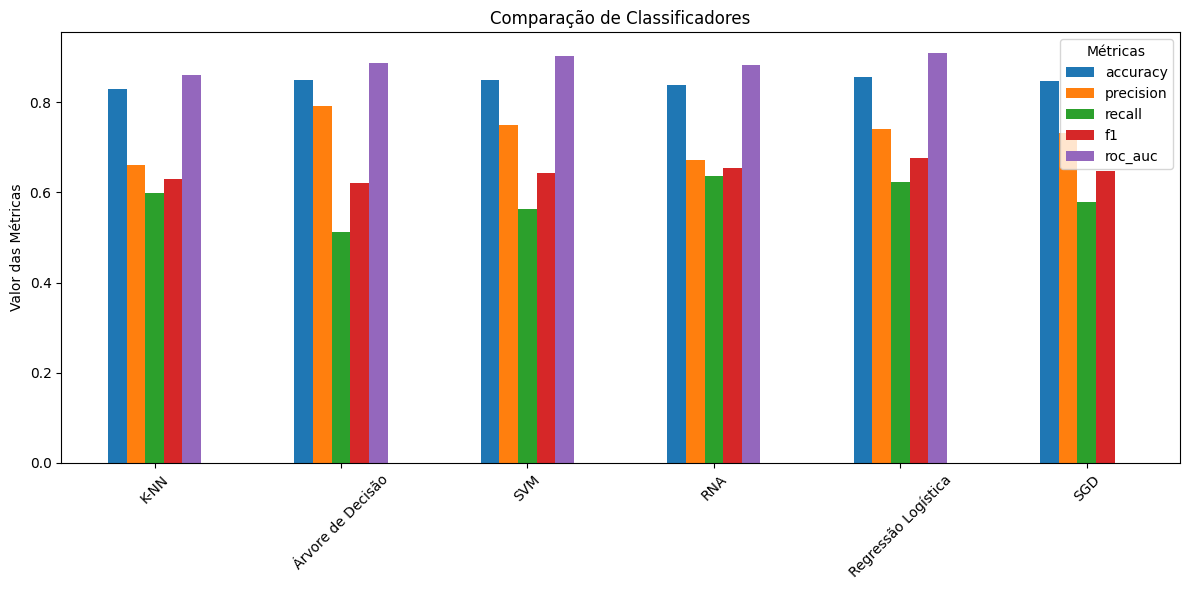

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um gráfico de barras para as métricas
results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparação de Classificadores')
plt.ylabel('Valor das Métricas')
plt.xticks(rotation=45)
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()


In [52]:
from scipy.stats import friedmanchisquare
import numpy as np

# Organizando as métricas de interesse para o teste
accuracy_values = [result['accuracy'] for result in results.values()]
precision_values = [result['precision'] for result in results.values()]
recall_values = [result['recall'] for result in results.values()]
f1_values = [result['f1'] for result in results.values()]
roc_auc_values = [result['roc_auc'] for result in results.values()]

# Teste de Friedman
friedman_test = friedmanchisquare(accuracy_values, precision_values, recall_values, f1_values, roc_auc_values)
print("Resultados do Teste de Friedman:", friedman_test)

# Se o p-valor for menor que 0.05, realizamos o teste post-hoc
if friedman_test.pvalue < 0.05:
    print("Diferenças significativas encontradas. Realizando teste post-hoc de Nemenyi.")
    from scikit_posthocs import posthoc_nemenyi_friedman

    # Criando um DataFrame para os dados
    metrics_data = pd.DataFrame({
        'accuracy': accuracy_values,
        'precision': precision_values,
        'recall': recall_values,
        'f1': f1_values,
        'roc_auc': roc_auc_values
    })
    
    # Realizando o teste de Nemenyi
    nemenyi_results = posthoc_nemenyi_friedman(metrics_data.values)
    print("Resultados do teste de Nemenyi:\n", nemenyi_results)


Resultados do Teste de Friedman: FriedmanchisquareResult(statistic=np.float64(17.33333333333333), pvalue=np.float64(0.0016649118076211677))
Diferenças significativas encontradas. Realizando teste post-hoc de Nemenyi.
Resultados do teste de Nemenyi:
           0         1         2         3         4
0  1.000000  0.783655  0.008987  0.182923  0.900000
1  0.783655  1.000000  0.182923  0.783655  0.680037
2  0.008987  0.182923  1.000000  0.783655  0.004751
3  0.182923  0.783655  0.783655  1.000000  0.122823
4  0.900000  0.680037  0.004751  0.122823  1.000000


## Interpretação dos Resultados

### Teste de Friedman

- **Estatística de Friedman**: `17.33`
- **p-valor**: `0.00166`

**Interpretação**:
- O p-valor é menor que 0.05, o que indica que existe uma diferença significativa nas métricas de desempenho entre os classificadores testados. Isso significa que pelo menos um dos classificadores teve um desempenho diferente dos outros em alguma das métricas de avaliação.

### Teste Post-Hoc de Nemenyi

Os resultados do teste de Nemenyi são apresentados na matriz abaixo, onde cada célula (i, j) indica o p-valor da comparação entre os modelos i e j:



In [53]:
print("Resultados do teste de Nemenyi:\n", nemenyi_results)

Resultados do teste de Nemenyi:
           0         1         2         3         4
0  1.000000  0.783655  0.008987  0.182923  0.900000
1  0.783655  1.000000  0.182923  0.783655  0.680037
2  0.008987  0.182923  1.000000  0.783655  0.004751
3  0.182923  0.783655  0.783655  1.000000  0.122823
4  0.900000  0.680037  0.004751  0.122823  1.000000



- **Identificação dos Modelos**: 
  - 0: K-NN
  - 1: Árvore de Decisão
  - 2: SVM
  - 3: RNA (Rede Neural Artificial)
  - 4: Regressão Logística

**Análise das Comparações**:
- **K-NN vs SVM**: p-valor = `0.008987` (diferença significativa)
- **K-NN vs Regressão Logística**: p-valor = `0.900000` (sem diferença significativa)
- **SVM vs Regressão Logística**: p-valor = `0.004751` (diferença significativa)

**Interpretação**:
- K-NN e SVM são significativamente diferentes, com K-NN tendo um desempenho pior em comparação ao SVM em pelo menos uma métrica.
- A SVM e a Regressão Logística também apresentam diferenças significativas.
- Modelos como Árvore de Decisão e RNA não mostram diferenças significativas com relação a outros modelos em geral.

### Conclusões

1. **Desempenho dos Classificadores**: Com base nos resultados dos testes, você pode concluir que o SVM se destacou entre os classificadores avaliados, enquanto o K-NN teve um desempenho inferior em relação a ele.
2. **Relevância das Métricas**: Considere discutir quais métricas são mais relevantes para o seu problema específico (por exemplo, precisão pode ser mais importante do que recall dependendo do contexto).
3. **Próximos Passos**: Você pode explorar melhorias na modelagem, ajustar hiperparâmetros, ou mesmo considerar outros classificadores, dependendo do contexto do seu problema e dos resultados obtidos.
